In [1]:
# https://en.wikipedia.org/wiki/Big_Five_personality_traits
# https://ipip.ori.org/newBigFive5broadKey.htm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [3]:
file_to_open = pd.read_csv("Resources/data.csv", delimiter="\t")
data=file_to_open.copy()
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [4]:
data.shape

(19719, 57)

In [5]:
data.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [6]:
data.isnull().values.any()

True

In [7]:
data.isnull().sum()

race       0
age        0
engnat     0
gender     0
hand       0
source     0
country    9
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
N1         0
N2         0
N3         0
N4         0
N5         0
N6         0
N7         0
N8         0
N9         0
N10        0
A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
O1         0
O2         0
O3         0
O4         0
O5         0
O6         0
O7         0
O8         0
O9         0
O10        0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
print(f"Number of participants: {len(data)}")

Number of participants: 19710


In [10]:
data.age.value_counts()

18      1522
17      1370
19      1259
20      1231
21      1215
        ... 
1964       1
92         1
266        1
1974       1
1999       1
Name: age, Length: 104, dtype: int64

In [11]:
# calculate maximum year we're looking for in the data
max_year = 2012-13
print(f"Youngest participient's date of birth: {max_year}")

Youngest participient's date of birth: 1999


In [12]:
data= data.loc[data["age"]<2000]
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [13]:
data["age"] = [2012-x if x >1960 else x for x in data["age"]]
data= data.loc[data["age"]<=120]
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [14]:
data.age.sort_values(ascending=False) 

18998    118
8849     100
14145     99
11468     97
8223      92
        ... 
15279     13
409       13
12922     13
12920     13
19324     13
Name: age, Length: 19700, dtype: int64

In [15]:
data.describe()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,...,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000
mean,5.323706,26.253147,1.364924,1.616751,1.129949,1.952792,2.628934,2.759442,3.417005,3.151777,...,3.692183,2.149543,4.126497,2.079695,3.872944,1.794721,4.073046,3.207919,4.133553,4.004772
std,4.018238,11.578618,0.488747,0.498970,0.413202,1.505124,1.232451,1.313783,1.236682,1.222623,...,1.116163,1.135150,1.006320,1.109903,0.939701,1.068349,0.923433,1.258916,0.982811,0.983739
min,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,22.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,31.000000,2.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,118.000000,2.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
data.dtypes

race        int64
age         int64
engnat      int64
gender      int64
hand        int64
source      int64
country    object
E1          int64
E2          int64
E3          int64
E4          int64
E5          int64
E6          int64
E7          int64
E8          int64
E9          int64
E10         int64
N1          int64
N2          int64
N3          int64
N4          int64
N5          int64
N6          int64
N7          int64
N8          int64
N9          int64
N10         int64
A1          int64
A2          int64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
C1          int64
C2          int64
C3          int64
C4          int64
C5          int64
C6          int64
C7          int64
C8          int64
C9          int64
C10         int64
O1          int64
O2          int64
O3          int64
O4          int64
O5          int64
O6          int64
O7          int64
O8          int64
O9        

In [17]:
data.corr()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
race,1.000000,-0.088921,0.216892,0.049650,-0.018671,0.020120,0.020012,0.014790,0.041749,0.018518,...,-0.201992,0.140322,-0.066671,0.107755,-0.041727,0.041956,-0.075708,-0.203321,-0.069101,-0.069752
age,-0.088921,1.000000,-0.077145,-0.031735,-0.008171,-0.058024,0.020119,-0.044912,0.107031,-0.074606,...,0.134118,-0.058216,-0.026179,-0.015818,0.106118,-0.015788,0.091594,0.016863,0.048236,0.039314
engnat,0.216892,-0.077145,1.000000,-0.080522,-0.065659,-0.109697,-0.032902,0.068099,-0.023168,0.053935,...,-0.103674,0.054253,-0.014077,0.042960,-0.040631,0.002601,0.020232,-0.125054,-0.069974,-0.058841
gender,0.049650,-0.031735,-0.080522,1.000000,-0.005388,0.048031,0.004000,-0.113310,0.016238,-0.057923,...,-0.065174,0.087210,-0.010610,0.052679,-0.100933,0.010108,-0.062083,-0.083255,0.003968,-0.085629
hand,-0.018671,-0.008171,-0.065659,-0.005388,1.000000,-0.003359,0.001388,0.007559,-0.021511,0.017530,...,0.056027,-0.022818,0.051906,-0.011957,0.035334,-0.031909,0.027673,0.067016,0.007013,0.050302
source,0.020120,-0.058024,-0.109697,0.048031,-0.003359,1.000000,0.067893,-0.057421,0.101285,-0.075940,...,-0.048295,0.013313,-0.056318,0.013982,0.008106,0.028068,-0.047593,-0.055796,-0.025285,-0.023950
E1,0.020012,0.020119,-0.032902,0.004000,0.001388,0.067893,1.000000,-0.421352,0.474594,-0.483899,...,0.040662,-0.025721,0.072803,-0.004952,0.185202,-0.094519,0.082740,0.005166,-0.080078,0.163624
E2,0.014790,-0.044912,0.068099,-0.113310,0.007559,-0.057421,-0.421352,1.000000,-0.445166,0.527824,...,-0.054376,0.057958,-0.041067,0.035638,-0.128461,0.104603,-0.056733,-0.020523,0.066518,-0.140396
E3,0.041749,0.107031,-0.023168,0.016238,-0.021511,0.101285,0.474594,-0.445166,1.000000,-0.481415,...,0.031139,-0.067423,-0.002169,-0.021550,0.164411,-0.077868,0.138021,-0.073496,-0.088467,0.121793
E4,0.018518,-0.074606,0.053935,-0.057923,0.017530,-0.075940,-0.483899,0.527824,-0.481415,1.000000,...,-0.044849,0.097802,0.027057,0.061228,-0.143605,0.090079,-0.072949,0.006013,0.109997,-0.128785


In [18]:
data.country.value_counts()

US    8748
GB    1531
IN    1463
AU     974
CA     923
      ... 
SR       1
TC       1
BF       1
KG       1
GD       1
Name: country, Length: 158, dtype: int64

In [19]:
data.country.value_counts().mean()

124.68354430379746

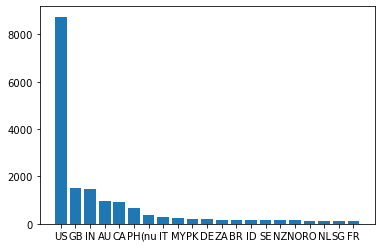

In [20]:
countries = pd.DataFrame(data["country"].value_counts())
c_125= countries.loc[countries["country"]>125]
plt.bar(c_125.index,c_125["country"])
plt.show()

In [21]:
c_125.nunique()

country    20
dtype: int64

In [22]:
# Recheck how many cluster we should have as maximum
from sklearn.preprocessing import MinMaxScaler

df = data.drop("country", axis=1)
trim_df = df.drop(df.columns[:6], axis=1)
columns = list(trim_df.columns)
scaler = MinMaxScaler(feature_range=(0,1))
scale_df = scaler.fit_transform(trim_df)
scale_df = pd.DataFrame(scale_df, columns=columns)
scale_df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.8,0.2,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,0.8,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,0.8,0.6,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.6,0.2,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6


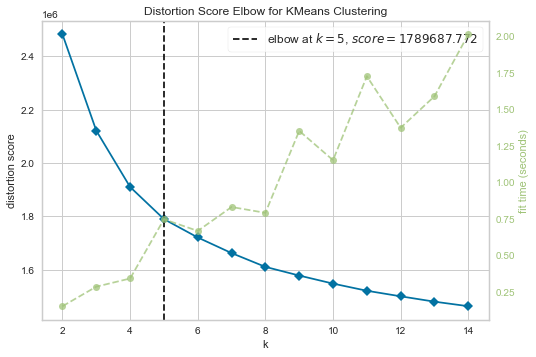

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
#Elbow Method 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df)
visualizer.poof()

In [24]:
# cluster analysis- Aysin

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [26]:
kmeans.fit(scale_df)

KMeans(n_clusters=5)

In [27]:
predicted_clusters = kmeans.predict(scale_df)

In [28]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
labels

array([1, 2, 4, ..., 0, 0, 0])

In [29]:
len(labels)

19700

In [30]:
centers

array([[0.35772553, 0.71765835, 0.45825336, 0.81113244, 0.47456814,
        0.65647793, 0.34145873, 0.79956814, 0.45100768, 0.90158349,
        0.84836852, 0.50095969, 0.9043666 , 0.44942418, 0.75220729,
        0.81861804, 0.81976967, 0.78334933, 0.8193858 , 0.80091171,
        0.50033589, 0.68949136, 0.48891555, 0.79265835, 0.48027831,
        0.80278311, 0.53368522, 0.70772553, 0.7668906 , 0.62164107,
        0.57389635, 0.65690979, 0.75974088, 0.68886756, 0.44520154,
        0.69361804, 0.70417466, 0.60575816, 0.5700096 , 0.67159309,
        0.69452975, 0.50503839, 0.82879079, 0.45628599, 0.69702495,
        0.40700576, 0.74784069, 0.63963532, 0.8584453 , 0.7384357 ],
       [0.69007866, 0.38066481, 0.90438975, 0.4312611 , 0.89322507,
        0.32032479, 0.81979193, 0.55209338, 0.78487693, 0.48952043,
        0.45699061, 0.77538696, 0.61847247, 0.66835828, 0.42481604,
        0.3876681 , 0.41720376, 0.33478812, 0.41334687, 0.34534382,
        0.37244354, 0.90347628, 0.34174067, 0.8

In [31]:
# scale_df = scale_df.add(labels)
scale_df['cluster'] = labels.tolist()
scale_df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.2,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,0.6,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.2,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,1.0,...,0.6,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0
19696,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,0.8,...,0.4,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3
19697,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,1.0,...,0.6,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0
19698,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,1.0,...,0.4,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0


In [ ]:
# analysis of the clusters- Michael

In [ ]:
scale_df

In [ ]:
wieghted_df = pd.DataFrame(scale_df, copy=True)
wieghted_df

In [ ]:
wieghted_df['E2'] = 1.2 - wieghted_df['E2'] 

In [ ]:
wieghted_df['E4'] = 1.2 -wieghted_df['E4']

In [ ]:
wieghted_df['E6'] = 1.2 - wieghted_df['E6']

In [ ]:
wieghted_df['E8'] = 1.2 - wieghted_df['E8']

In [ ]:
wieghted_df['E10'] = 1.2 - wieghted_df['E10']

In [ ]:
wieghted_df['N2'] = 1.2 - wieghted_df['N2']

In [ ]:
wieghted_df['N4'] = 1.2 - wieghted_df['N4']

In [ ]:
wieghted_df['A1'] = 1.2 - wieghted_df['A1']

In [ ]:
wieghted_df['A3'] = 1.2 - wieghted_df['A3']

In [ ]:
wieghted_df['A5'] = 1.2- wieghted_df['A5']

In [ ]:
wieghted_df['A7'] = 1.2 - wieghted_df['A7']

In [ ]:
wieghted_df['C2'] = 1.2 - wieghted_df['C2']

In [ ]:
wieghted_df['C4'] = 1.2 - wieghted_df['C4']

In [ ]:
wieghted_df['C6'] = 1.2 - wieghted_df['C6']

In [ ]:
wieghted_df['C8'] = 1.2 - wieghted_df['C8']

In [ ]:
wieghted_df['O2'] = 1.2 - wieghted_df['O2']

In [ ]:
wieghted_df['O4'] = 1.2 - wieghted_df['O4']

In [ ]:
wieghted_df['O6'] = 1.2 - wieghted_df['O6']

In [ ]:
wieghted_df

In [ ]:
E = wieghted_df

In [ ]:
E['E_Sum_Result'] = wieghted_df.loc[:,["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10"]].sum(axis=1)
E

In [ ]:
N = wieghted_df
N['N_Sum_Result'] = wieghted_df.loc[:,"N1":"N10"].sum(axis=1)
N

In [ ]:
A = wieghted_df
A['A_Sum_Result'] = wieghted_df.loc[:,"A1":"A10"].sum(axis=1)
A

In [ ]:
C = wieghted_df
C['C_Sum_Result'] = wieghted_df.loc[:,"C1":"C10"].sum(axis=1)
C

In [ ]:
O = wieghted_df
O['O_Sum_Result'] = wieghted_df.loc[:,"O1":"O10"].sum(axis=1)
O

In [ ]:
sums_df = pd.DataFrame()

In [ ]:
sums_df["O"] = O['O_Sum_Result']
sums_df["C"] = C['C_Sum_Result']
sums_df["E"] = E['E_Sum_Result']
sums_df["A"] = A['A_Sum_Result']
sums_df["N"] = N['N_Sum_Result']
sums_df["Cluster"] = wieghted_df['cluster']
sums_df

In [ ]:
cluster_avg = sums_df.groupby('Cluster').mean()
cluster_avg

In [ ]:
cluster_avg.to_csv('Cluster_summary.csv')
sums_df.to_csv('Graded_idnv_score.csv')

In [ ]:
# analysis of the questions- Stephen

#Find silhouette score of current cluster model

from sklearn import metrics

raw_df = scale_df.drop(columns=["cluster"])

print(metrics.silhouette_score(raw_df, labels, metric='euclidean'))


In [ ]:
# Find the standard deviation of means in responses to each question across clusters

question_df = scale_df.groupby("cluster").mean()

question_std = question_df.std()

sorted_std = question_std.sort_values(ascending=False)

sorted_std

In [ ]:
#Plot standard deviation to find obvious discontinuities

sorted_std.plot.bar()

In [ ]:
print(sorted_std.index)

In [ ]:
#Create two subgroups of questions to analyze

cut1 = ['E7', 'N8', 'E5', 'N6', 'E3', 'N10', 'N7', 'E10', 'N1', 'E2', 'N9',
       'E9', 'E4', 'E1', 'E6', 'A7', 'C4', 'N5', 'A9', 'A4', 'N3', 'A2', 'A5',
       'E8', 'A6', 'C6', 'A10', 'N2', 'A8', 'A1', 'A3', 'C8', 'C5', 'C2', 'C9',
       'N4', 'C1']

cut2 = ['E7', 'N8', 'E5', 'N6', 'E3', 'N10', 'N7', 'E10', 'N1', 'E2', 'N9',
       'E9', 'E4', 'E1', 'E6', 'A7', 'C4', 'N5', 'A9', 'A4', 'N3']

brief1_df = raw_df[cut1]

brief2_df = raw_df[cut2]

In [ ]:
# Create cluster models for each subgroup

kmeans_raw = KMeans(n_clusters=5)
kmeans_raw.fit(raw_df)

kmeans_brief1 = KMeans(n_clusters=5)
kmeans_brief1.fit(brief1_df)

kmeans_brief2 = KMeans(n_clusters=5)
kmeans_brief2.fit(brief2_df)


In [ ]:
#Compare silhouette scores for each subgroup to the original set

raw_labels = kmeans_raw.labels_
brief1_labels = kmeans_brief1.labels_
brief2_labels = kmeans_brief2.labels_

print(metrics.silhouette_score(raw_df, raw_labels, metric='euclidean'))
print(metrics.silhouette_score(brief1_df, brief1_labels, metric='euclidean'))
print(metrics.silhouette_score(brief2_df, brief2_labels, metric='euclidean'))

In [ ]:
#Test each question one by one to identify useful questions

#Create data list

colsToDrop = ['E7', 'N8', 'E5', 'N6', 'E3', 'N10', 'N7', 'E10', 'N1', 'E2', 'N9',
       'E9', 'E4', 'E1', 'E6', 'A7', 'C4', 'N5', 'A9', 'A4', 'N3', 'A2', 'A5',
       'E8', 'A6', 'C6', 'A10', 'N2', 'A8', 'A1', 'A3', 'C8', 'C5', 'C2', 'C9',
       'N4', 'C1', 'O2', 'O10', 'O5', 'C7', 'C10', 'O7', 'C3', 'O1', 'O8',
       'O6', 'O4', 'O9', 'O3']

In [ ]:
#Check other cluster counts for better coverage with different question sets

clusterCount = [3,4,5,6,7,8,9,10]

#Establish base silhouette scores to use as thresholds for question analysis for each cluster

thresholds = []

for x in clusterCount:

    kmeans_control = KMeans(n_clusters=x)
    kmeans_control.fit(raw_df)

    control_labels = kmeans_control.labels_

    thresholds.append(metrics.silhouette_score(raw_df, control_labels, metric="euclidean"))

thresholds

In [ ]:
#establish the silhouette score threshold for each cluster

threshold_df = pd.DataFrame(clusterCount, columns=["Clusters"])
threshold_df["Threshold"] = thresholds

threshold_df

In [ ]:
# Run a new cluster analysis for each cluster count, omitting each question one at a time, and record the resulting silhouette score

scores_df = pd.DataFrame()
scores_df["Question"] = np.NaN
scores_df["Score"] = np.NaN
scores_df["N"] = np.NaN

clusterCount = [3,4,5,6,7,8,9,10]
counter = 0

for x in colsToDrop:
    test_df = raw_df.drop(columns=[x])
    
    for y in clusterCount:
        kmeans_test = KMeans(n_clusters=y)
        kmeans_test.fit(test_df)

        test_labels = kmeans_test.labels_

        score = metrics.silhouette_score(test_df, test_labels, metric="euclidean")

        newRow = pd.DataFrame({"Question": [x], "Score": [score], "N": [y]})
        scores_df = pd.concat([scores_df, newRow])
    
scores_df

In [ ]:
# For each cluster count, drop all questions where omitting the question resulted in a higher score.
# Re-run the cluster analysis using only qualifying questions.
# Visualize the silhouette scores for each number of clusters
# Save results to a dataframe

from yellowbrick.cluster import SilhouetteVisualizer

trim_df = pd.DataFrame()
trim_df["N"] = np.NaN
trim_df["Score"] = np.NaN
trim_df["Questions"] = np.NaN


for index, row in threshold_df.iterrows():
    temp_df = scores_df[scores_df["N"] == row[0]]
    temp_df = temp_df[temp_df["Score"] < row[1]]
    
    tempQuest = temp_df["Question"].tolist()
    
    tempTrim_df = raw_df[tempQuest]
    
    kmeans_temp = KMeans(n_clusters=int(row[0]))
    kmeans_temp.fit(tempTrim_df)

    temp_labels = kmeans_temp.labels_    

    trim_score = metrics.silhouette_score(tempTrim_df, temp_labels, metric="euclidean")
        
    newRow = pd.DataFrame({"N": row[0], "Score": [trim_score], "Questions": [tempQuest]})
    trim_df = pd.concat([trim_df, newRow])
    
    visualizer = SilhouetteVisualizer(kmeans_temp, colors='yellowbrick')
    
    visualizer.fit(tempTrim_df)
    visualizer.show()
    

trim_df

In [ ]:
# Prepare data for export

score_cols_df = pd.DataFrame(scores_df.groupby(["Question","N"]).aggregate('first').unstack())

score_cols_df

In [ ]:
score_cols_df = score_cols_df.droplevel(level=0, axis=1)


In [ ]:
# Add standard deviation values from above

score_cols_df["Group Standard Deviation"] = question_std

score_cols_df

In [ ]:
# Add question text

question_text_df = pd.DataFrame()

question_text_df["Question Code"] = ['E1','E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3','N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5','A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9','O10']

question_text_df["Question Text"] = ["I am the life of the party.", "I don't talk a lot.", "I feel comfortable around people.", "I keep in the background.", "I start conversations.", "I have little to say.", "I talk to a lot of different people at parties.", "I don't like to draw attention to myself.", "I don't mind being the center of attention.", "I am quiet around strangers.", "I get stressed out easily.", "I am relaxed most of the time.", "I worry about things.", "I seldom feel blue.", "I am easily disturbed.", "I get upset easily.", "I change my mood a lot.", "I have frequent mood swings.", "I get irritated easily.", "I often feel blue.", "I feel little concern for others.", "I am interested in people.", "I insult people.", "I sympathize with others' feelings.", "I am not interested in other people's problems.", "I have a soft heart.", "I am not really interested in others.", "I take time out for others.", "I feel others' emotions.", "I make people feel at ease.", "I am always prepared.", "I leave my belongings around.", "I pay attention to details.", "I make a mess of things.", "I get chores done right away.", "I often forget to put things back in their proper place.", "I like order.", "I shirk my duties.", "I follow a schedule.", "I am exacting in my work.", "I have a rich vocabulary.", "I have difficulty understanding abstract ideas.", "I have a vivid imagination.", "I am not interested in abstract ideas.", "I have excellent ideas.", "I do not have a good imagination.", "I am quick to understand things.", "I use difficult words.", "I spend time reflecting on things.", "I am full of ideas."]

question_text_df.sort_values("Question Code", inplace=True)

question_text_df["Question Text"]


In [ ]:
# Add threshold data from above

score_cols_df["Threshold 3"] = threshold_df["Threshold"][0]
score_cols_df["Threshold 4"] = threshold_df["Threshold"][1]
score_cols_df["Threshold 5"] = threshold_df["Threshold"][2]
score_cols_df["Threshold 6"] = threshold_df["Threshold"][3]
score_cols_df["Threshold 7"] = threshold_df["Threshold"][4]
score_cols_df["Threshold 8"] = threshold_df["Threshold"][5]
score_cols_df["Threshold 9"] = threshold_df["Threshold"][6]
score_cols_df["Threshold 10"] = threshold_df["Threshold"][7]

trim_df = trim_df.reset_index()

score_cols_df["New Score 3"] = trim_df["Score"][0]
score_cols_df["New Score 4"] = trim_df["Score"][1]
score_cols_df["New Score 5"] = trim_df["Score"][2]
score_cols_df["New Score 6"] = trim_df["Score"][3]
score_cols_df["New Score 7"] = trim_df["Score"][4]
score_cols_df["New Score 8"] = trim_df["Score"][5]
score_cols_df["New Score 9"] = trim_df["Score"][6]
score_cols_df["New Score 10"] = trim_df["Score"][7]

In [ ]:
# Combine into one dataframe and export as CSV

question_text_df["Question Text"]

score_cols_df["Question Text"] = question_text_df["Question Text"].values

score_cols_df

score_cols_df.to_csv("questions.csv")

In [ ]:
# demographic analysis-James


In [32]:
file_to_open = pd.read_csv("Resources/data.csv", delimiter="\t")
data_original=file_to_open.copy()
data_original.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [33]:
data_original.isnull().values.any()

True

In [34]:
data_original_no_na = data_original.dropna()

In [35]:
len(data_original_no_na)

19710

In [36]:
data_original_less_2000= data_original_no_na.loc[data_original_no_na["age"]<2000]
data_original_less_2000.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [37]:
len(data_original_less_2000)

19707

In [38]:
data_original_less_2000["age"] = [2012-x if x >1960 else x for x in data_original_less_2000["age"]]
data_original_real_ages = data_original_less_2000.loc[data_original_less_2000["age"]<=120]
data_original_real_ages.head()

<ipython-input-38-00d2caa5a3a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_original_less_2000["age"] = [2012-x if x >1960 else x for x in data_original_less_2000["age"]]


,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [39]:
len(data_original_real_ages)

19700

In [40]:
# SEPARATE OUT META DATA (DEMOGRAPHICS)

data_meta_data = data_original_real_ages.iloc[:, :7]
data_meta_data.head()

,race,age,engnat,gender,hand,source,country
0,3,53,1,1,1,1,US
1,13,46,1,2,1,1,US
2,1,14,2,2,1,1,PK
3,3,19,2,2,1,1,RO
4,11,25,2,2,1,2,US


In [41]:
len(data_meta_data)

19700

In [42]:
# SEPARATE OUT QUESTIONS DATA

questions_data = data_original_real_ages.iloc[:, 7:]
questions_data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,2,5,2,5,1,4,3,5,1,...,4,1,3,1,5,1,4,2,5,5
1,2,2,3,3,3,3,1,5,1,5,...,3,3,3,3,2,3,3,1,3,2
2,5,1,1,4,5,1,1,5,5,1,...,4,5,5,1,5,1,5,5,5,5
3,2,5,2,4,3,4,3,4,4,5,...,4,3,5,2,4,2,5,2,5,5
4,3,1,3,3,3,1,3,1,3,5,...,3,1,1,1,3,1,3,1,5,3


In [43]:
len(questions_data)

19700

In [44]:
# Bringing down from earlier cluster analysis
scale_df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.2,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,0.6,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.2,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,1.0,...,0.6,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0
19696,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,0.8,...,0.4,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3
19697,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,1.0,...,0.6,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0
19698,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,1.0,...,0.4,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0


In [45]:
# RECOMBINE WITH META_DATA


In [46]:
# RENAME scale_df TO combine_df

combine_df = scale_df
combine_df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.2,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,0.6,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.2,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2


In [47]:
len(combine_df)

19700

In [48]:
# MERGE CUSTERED QUESTION DATA WITH META_DATA

clustered_df = pd.merge(data_meta_data, combine_df , left_index=True, right_index=True)
clustered_df

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,3,53,1,1,1,1,US,0.8,0.4,1.0,...,0.2,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1
1,13,46,1,2,1,1,US,0.4,0.4,0.6,...,0.6,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2
2,1,14,2,2,1,1,PK,1.0,0.2,0.2,...,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4
3,3,19,2,2,1,1,RO,0.4,1.0,0.4,...,0.6,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0
4,11,25,2,2,1,2,US,0.6,0.2,0.6,...,0.2,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,11,17,2,1,1,1,ID,0.2,0.8,0.6,...,0.6,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0
19696,3,18,1,1,1,1,GB,0.4,0.6,0.4,...,0.4,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3
19697,3,39,1,1,1,1,US,0.4,1.0,0.8,...,0.6,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0
19698,13,21,1,1,1,5,US,0.2,0.8,0.4,...,0.4,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0


In [49]:
# DROP ALL META DATA COLUMNS EXCEPT AGE
age_df = clustered_df.drop(['race', 'engnat', 'gender', 'hand', 'source', 'country'], axis = 1)
age_df

,age,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,53,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,...,0.2,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1
1,46,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,...,0.6,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2
2,14,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,...,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4
3,19,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,...,0.6,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0
4,25,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,...,0.2,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,17,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,...,0.6,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0
19696,18,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,...,0.4,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3
19697,39,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,...,0.6,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0
19698,21,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,...,0.4,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0


In [50]:
age_cl = age_df.groupby("cluster").head(19681)
age_cl

,age,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,53,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,...,0.2,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1
1,46,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,...,0.6,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2
2,14,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,...,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4
3,19,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,...,0.6,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0
4,25,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,...,0.2,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,17,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,...,0.6,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0
19696,18,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,...,0.4,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3
19697,39,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,...,0.6,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0
19698,21,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,...,0.4,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0


<AxesSubplot:title={'center':'age'}, xlabel='cluster'>

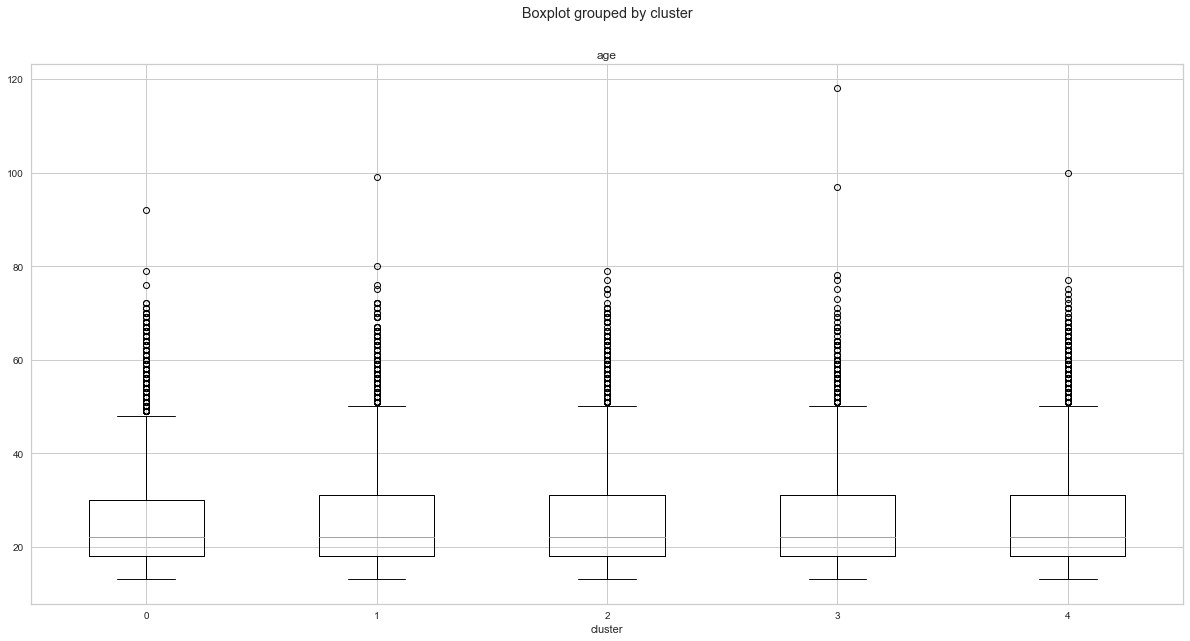

In [51]:
# Create a boxplot to compare means
age_cl.boxplot("age", by="cluster", figsize=(20, 10))

In [52]:
# Hypothesis (H0):clusters are the same with respect to age

cluster1 = age_cl[age_cl["cluster"] == 0]["age"]
cluster2 = age_cl[age_cl["cluster"] == 1]["age"]
cluster3 = age_cl[age_cl["cluster"] == 2]["age"]
cluster4 = age_cl[age_cl["cluster"] == 3]["age"]
cluster5 = age_cl[age_cl["cluster"] == 4]["age"]

In [53]:
# ANOVA
# Conclusion:  We fail to reject H0 because p value >>.05
stats.f_oneway(cluster1, cluster2, cluster3, cluster4, cluster5)

F_onewayResult(statistic=0.6497386107363465, pvalue=0.6270153590109087)

In [54]:
# Save to a csv file to use in Tableau
age_cl.to_csv('clustr_age.csv', index = False)

In [ ]:
#demographic analysis -Hai
# country, handedness,engnat

In [ ]:
# country_df = scale_df
# country_df['country'] = data['country']
# country_df

In [ ]:
#
#cluster0_df = age_df[age_df['cluster']==0]
# cluster0x_df = cluster0_df.loc[:, 'E1':'O10']
# cluster0y_df =  cluster0_df.loc[:, 'age']
#cluster0y_df.head()
#cluster0x_df.head()
#cluster0_df.head()

In [55]:
cluster0_df = age_df[age_df['cluster']==0]
cluster0_corr = cluster0_df.corr()
cluster0_age=cluster0_corr.loc['age',:]

cluster1_df = age_df[age_df['cluster']==1]
cluster1_corr = cluster1_df.corr()
cluster1_age=cluster1_corr.loc['age',:]

cluster2_df = age_df[age_df['cluster']==2]
cluster2_corr = cluster2_df.corr()
cluster2_age=cluster2_corr.loc['age',:]

cluster3_df = age_df[age_df['cluster']==3]
cluster3_corr = cluster3_df.corr()
cluster3_age=cluster3_corr.loc['age',:]

cluster4_df = age_df[age_df['cluster']==4]
cluster4_corr = cluster4_df.corr()
cluster4_age=cluster4_corr.loc['age',:]

combine_age_df = pd.DataFrame({'cluster0':cluster0_age,'cluster1':cluster1_age,'cluster2':cluster2_age,'cluster3':cluster3_age,'cluster4':cluster4_age})
combine_age_df.head()

,cluster0,cluster1,cluster2,cluster3,cluster4
age,1.000000,1.000000,1.000000,1.000000,1.000000
E1,0.008069,-0.017396,0.013568,0.001533,-0.005462
E2,-0.008176,-0.001702,-0.016321,0.011986,0.005368
E3,0.025661,0.016639,-0.006168,-0.003787,-0.011610
E4,-0.000513,0.009698,-0.001880,-0.003031,0.000337


In [56]:
combine_age_df = pd.DataFrame({'cluster0':cluster0_age,'cluster1':cluster1_age,'cluster2':cluster2_age,'cluster3':cluster3_age,'cluster4':cluster4_age})
combine_age_df.head()


,cluster0,cluster1,cluster2,cluster3,cluster4
age,1.000000,1.000000,1.000000,1.000000,1.000000
E1,0.008069,-0.017396,0.013568,0.001533,-0.005462
E2,-0.008176,-0.001702,-0.016321,0.011986,0.005368
E3,0.025661,0.016639,-0.006168,-0.003787,-0.011610
E4,-0.000513,0.009698,-0.001880,-0.003031,0.000337


In [60]:
engnat_df = scale_df
engnat_df['engnat'] = data['engnat']
engnat_df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O3,O4,O5,O6,O7,O8,O9,O10,cluster,engnat
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1,1.0
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2,1.0
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4,2.0
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0,2.0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,1.0,...,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0,2.0
19696,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,0.8,...,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3,1.0
19697,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,1.0,...,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0,1.0
19698,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,1.0,...,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0,1.0


In [61]:
cluster0_df = engnat_df[engnat_df['cluster']==0]
cluster0_corr = cluster0_df.corr()
cluster0_engnat=cluster0_corr.loc['engnat',:]

cluster1_df = engnat_df[engnat_df['cluster']==1]
cluster1_corr = cluster1_df.corr()
cluster1_engnat=cluster1_corr.loc['engnat',:]

cluster2_df = engnat_df[engnat_df['cluster']==2]
cluster2_corr = cluster2_df.corr()
cluster2_engnat=cluster2_corr.loc['engnat',:]

cluster3_df = engnat_df[engnat_df['cluster']==3]
cluster3_corr = cluster3_df.corr()
cluster3_engnat=cluster3_corr.loc['engnat',:]

cluster4_df = engnat_df[engnat_df['cluster']==4]
cluster4_corr = cluster4_df.corr()
cluster4_engnat=cluster4_corr.loc['engnat',:]

combine_engnat_df = pd.DataFrame({'cluster0':cluster0_engnat,'cluster1':cluster1_engnat,'cluster2':cluster2_engnat,'cluster3':cluster3_engnat,'cluster4':cluster4_engnat})
combine_engnat_df.head()


,cluster0,cluster1,cluster2,cluster3,cluster4
E1,-0.007507,-0.019007,0.008492,0.018228,0.003177
E2,-0.008131,0.037186,0.008152,0.003179,0.007294
E3,-0.006738,-0.003012,-0.023326,0.036065,0.002212
E4,0.006723,0.001767,0.022850,-0.036614,0.017800
E5,0.015373,-0.020636,0.003667,0.026819,-0.003585


In [64]:

race_df = scale_df
race_df['race'] = data['race']
race_df=race_df.drop(['engnat'],axis =1)
race_df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O3,O4,O5,O6,O7,O8,O9,O10,cluster,race
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1,3.0
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2,13.0
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4,1.0
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0,3.0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,1.0,...,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0,11.0
19696,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,0.8,...,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3,3.0
19697,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,1.0,...,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0,3.0
19698,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,1.0,...,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0,13.0


In [65]:
cluster0_df = race_df[race_df['cluster']==0]
cluster0_corr = cluster0_df.corr()
cluster0_race=cluster0_corr.loc['race',:]

cluster1_df = race_df[race_df['race']==1]
cluster1_corr = cluster1_df.corr()
cluster1_race=cluster1_corr.loc['race',:]

cluster2_df = race_df[race_df['cluster']==2]
cluster2_corr = cluster2_df.corr()
cluster2_race=cluster2_corr.loc['race',:]

cluster3_df = race_df[race_df['cluster']==3]
cluster3_corr = cluster3_df.corr()
cluster3_race=cluster3_corr.loc['race',:]

cluster4_df = race_df[race_df['cluster']==4]
cluster4_corr = cluster4_df.corr()
cluster4_race=cluster4_corr.loc['race',:]

combine_race_df = pd.DataFrame({'cluster0':cluster0_race,'cluster1':cluster1_race,'cluster2':cluster2_race,'cluster3':cluster3_race,'cluster4':cluster4_race})
combine_race_df.head()

,cluster0,cluster1,cluster2,cluster3,cluster4
E1,-0.008158,NaN,0.015839,0.013840,-0.007294
E2,0.001986,NaN,0.001361,-0.012555,0.007820
E3,-0.002778,NaN,-0.008814,0.021226,0.012884
E4,0.005595,NaN,0.001681,-0.018693,0.031032
E5,0.010793,NaN,0.008065,-0.013285,0.016042


In [67]:
gender_df = scale_df
gender_df['gender'] = data['gender']
gender_df=gender_df.drop(['engnat','race'],axis =1)
gender_df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O3,O4,O5,O6,O7,O8,O9,O10,cluster,gender
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1,1.0
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2,2.0
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4,2.0
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0,2.0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,1.0,...,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0,1.0
19696,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,0.8,...,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3,1.0
19697,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,1.0,...,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0,1.0
19698,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,1.0,...,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0,1.0


In [68]:
cluster0_df = gender_df[gender_df['cluster']==0]
cluster0_corr = cluster0_df.corr()
cluster0_gender=cluster0_corr.loc['gender',:]

cluster1_df = gender_df[gender_df['cluster']==1]
cluster1_corr = cluster1_df.corr()
cluster1_gender=cluster1_corr.loc['gender',:]

cluster2_df = gender_df[gender_df['cluster']==2]
cluster2_corr = cluster2_df.corr()
cluster2_gender=cluster2_corr.loc['gender',:]

cluster3_df = gender_df[gender_df['cluster']==3]
cluster3_corr = cluster3_df.corr()
cluster3_gender=cluster3_corr.loc['gender',:]

cluster4_df = gender_df[gender_df['cluster']==4]
cluster4_corr = cluster4_df.corr()
cluster4_gender=cluster4_corr.loc['gender',:]
#cluster1_gender.head()
combine_gender_df = pd.DataFrame({'cluster0':cluster0_gender,'cluster1':cluster1_gender,'cluster2':cluster2_gender,'cluster3':cluster3_gender,'cluster4':cluster4_gender})
combine_gender_df.head()

,cluster0,cluster1,cluster2,cluster3,cluster4
E1,0.020276,-0.009847,-0.018448,0.013053,0.001019
E2,-0.003149,-0.003179,-0.012941,0.008101,-0.010838
E3,0.003596,0.022075,-0.022561,-0.014836,-0.009174
E4,-0.009268,0.003740,0.007648,0.024455,-0.005941
E5,-0.004878,0.001982,-0.042243,-0.018530,-0.006030


In [70]:
hand_df = scale_df
hand_df['hand'] = data['hand']
hand_df=hand_df.drop(['engnat','race','gender'],axis =1)
hand_df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O3,O4,O5,O6,O7,O8,O9,O10,cluster,hand
0,0.8,0.4,1.0,0.4,1.0,0.2,0.8,0.6,1.0,0.2,...,0.6,0.2,1.0,0.2,0.8,0.4,1.0,1.0,1,1.0
1,0.4,0.4,0.6,0.6,0.6,0.6,0.2,1.0,0.2,1.0,...,0.6,0.6,0.4,0.6,0.6,0.2,0.6,0.4,2,1.0
2,1.0,0.2,0.2,0.8,1.0,0.2,0.2,1.0,1.0,0.2,...,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,4,1.0
3,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.8,0.8,1.0,...,1.0,0.4,0.8,0.4,1.0,0.4,1.0,1.0,0,1.0
4,0.6,0.2,0.6,0.6,0.6,0.2,0.6,0.2,0.6,1.0,...,0.2,0.2,0.6,0.2,0.6,0.2,1.0,0.6,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,0.2,0.8,0.6,1.0,0.8,0.6,0.2,0.4,0.2,1.0,...,1.0,0.6,0.8,0.2,0.8,0.4,1.0,0.6,0,1.0
19696,0.4,0.6,0.4,0.6,0.4,0.6,0.4,0.8,0.8,0.8,...,0.6,0.4,0.6,0.6,0.8,0.4,0.6,0.6,3,1.0
19697,0.4,1.0,0.8,1.0,1.0,1.0,0.2,0.4,0.2,1.0,...,0.2,0.6,0.8,0.2,0.2,1.0,1.0,1.0,0,1.0
19698,0.2,0.8,0.4,0.6,0.4,0.8,0.2,0.6,0.8,1.0,...,1.0,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0,1.0


In [71]:
cluster0_df = hand_df[hand_df['cluster']==0]
cluster0_corr = cluster0_df.corr()
cluster0_hand=cluster0_corr.loc['hand',:]

cluster1_df = hand_df[hand_df['cluster']==1]
cluster1_corr = cluster1_df.corr()
cluster1_hand=cluster1_corr.loc['hand',:]

cluster2_df = hand_df[hand_df['cluster']==2]
cluster2_corr = cluster2_df.corr()
cluster2_hand=cluster2_corr.loc['hand',:]

cluster3_df = hand_df[hand_df['cluster']==3]
cluster3_corr = cluster3_df.corr()
cluster3_hand=cluster3_corr.loc['hand',:]

cluster4_df = hand_df[hand_df['cluster']==4]
cluster4_corr = cluster4_df.corr()
cluster4_hand=cluster4_corr.loc['hand',:]

combine_hand_df = pd.DataFrame({'cluster0':cluster0_hand,'cluster1':cluster1_hand,'cluster2':cluster2_hand,'cluster3':cluster3_hand,'cluster4':cluster4_hand})
combine_hand_df.head()

,cluster0,cluster1,cluster2,cluster3,cluster4
E1,-0.026511,-0.001323,-0.013011,-0.020359,0.016784
E2,-0.010380,-0.030377,-0.022611,0.010561,0.023282
E3,0.007392,0.001214,-0.015081,-0.011854,0.015400
E4,0.013481,-0.000730,-0.014912,0.001864,-0.010413
E5,-0.012121,0.005308,-0.023644,-0.002182,-0.003788
